In [1]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns

In [2]:
df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")


In [3]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()



df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ])


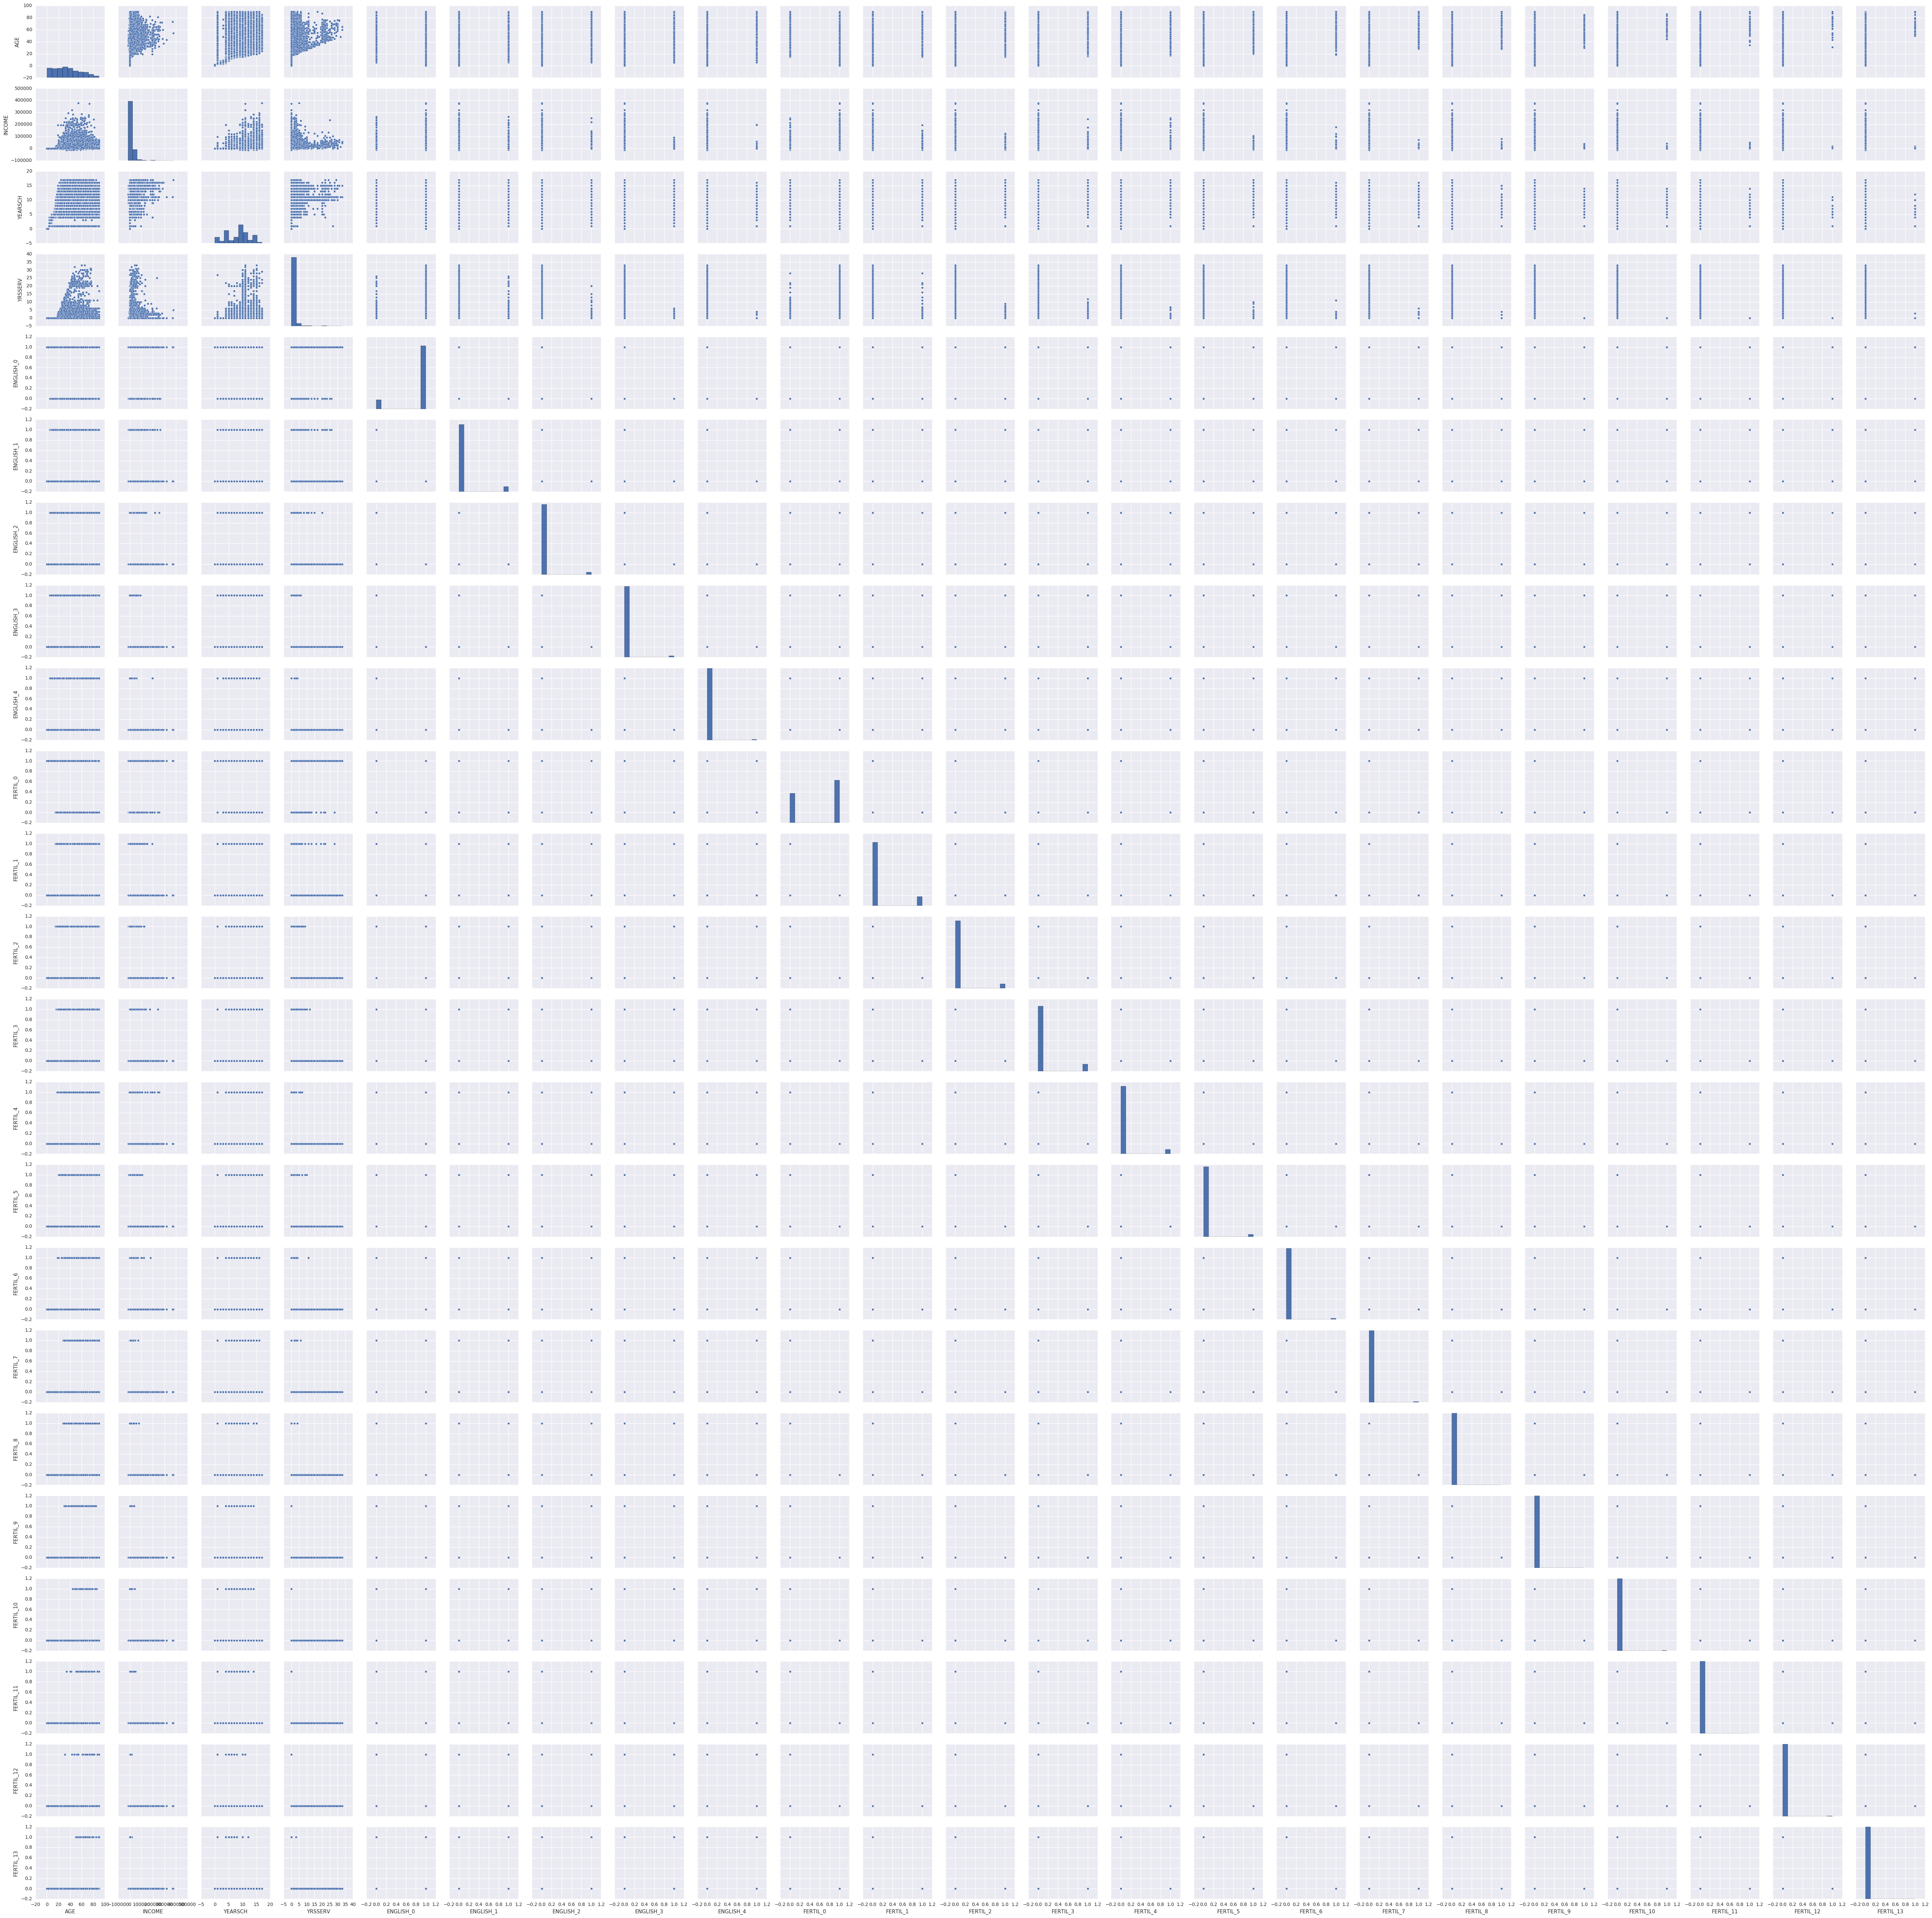

In [4]:
sns.pairplot(df_demo)

Number of clusters: 2
Silhouette Coefficient: 0.242


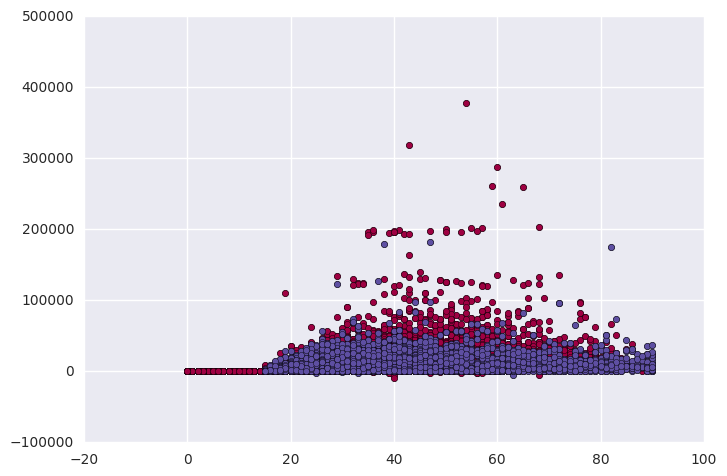

Number of clusters: 3
Silhouette Coefficient: 0.268


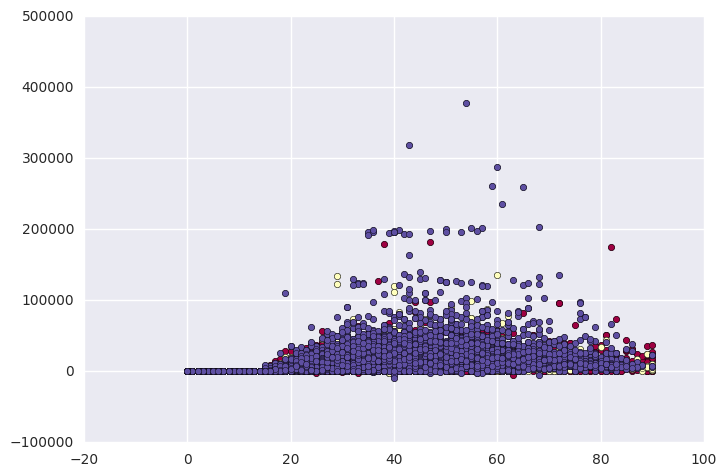

Number of clusters: 4
Silhouette Coefficient: 0.287


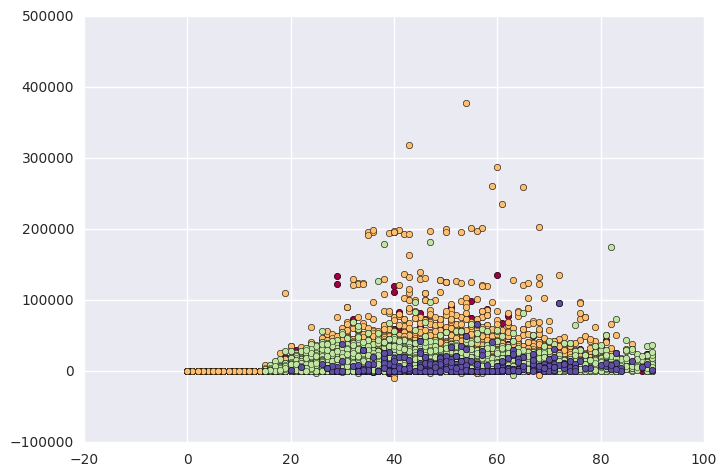

Number of clusters: 5
Silhouette Coefficient: 0.300


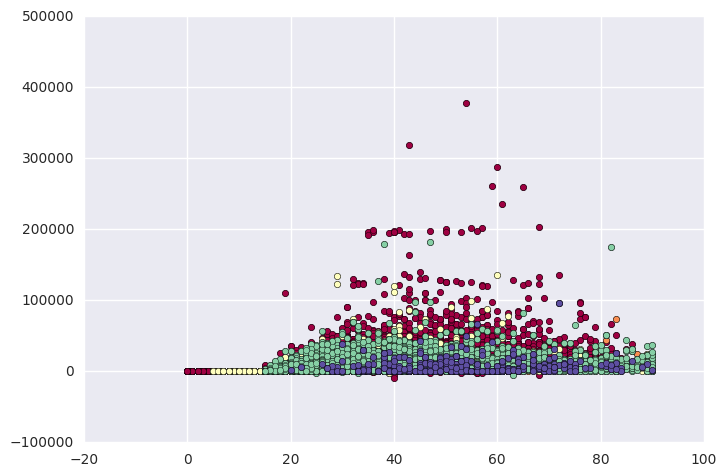

Number of clusters: 6
Silhouette Coefficient: 0.267


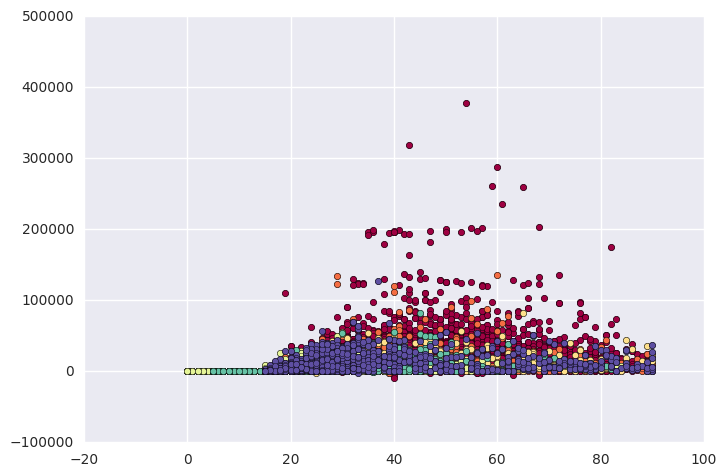

Number of clusters: 7
Silhouette Coefficient: 0.306


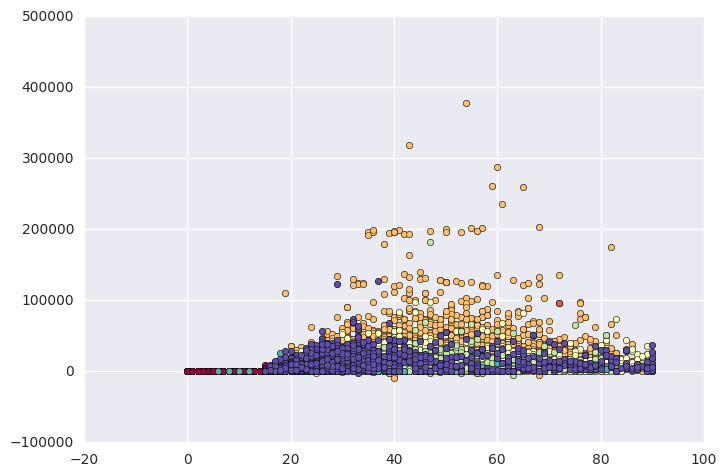

Number of clusters: 8
Silhouette Coefficient: 0.336


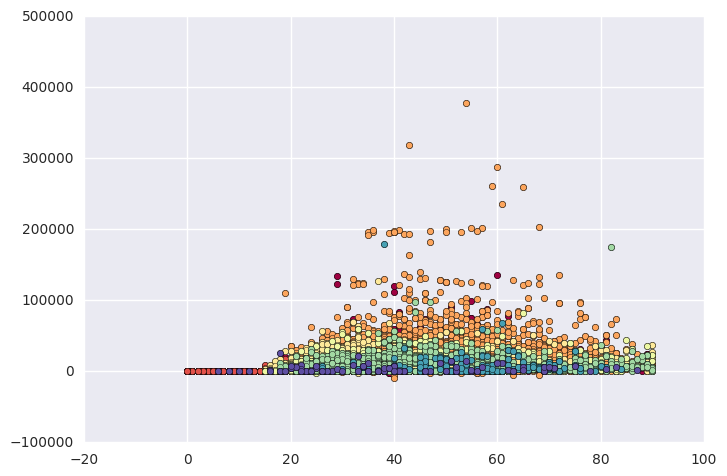

Number of clusters: 9
Silhouette Coefficient: 0.390


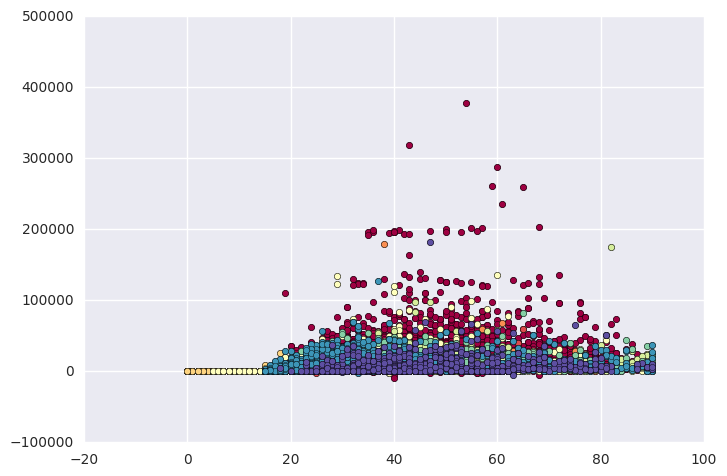

In [14]:
X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)

for i in range (2,10):
    n_clusters = i

    labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




    print('Number of clusters: %d' % n_clusters)

    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X_db, labels))

    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
        # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')
    plt .show()

In [55]:
data =[]
for i in range (0,10):
    for k in range (2,11):
        X = df_demo.values[np.random.choice(df_demo.values.shape[0], 1000)]

        from sklearn import metrics
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_db = sc.fit_transform(X)

    
        n_clusters = k

        labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




        print('Number of clusters: %d' % n_clusters)

        print("Silhouette Coefficient: %0.3f"
                % metrics.silhouette_score(X_db, labels))

        s=metrics.silhouette_score(X_db, labels)
        data.append([s,k])
    


Number of clusters: 2
Silhouette Coefficient: 0.160
Number of clusters: 3
Silhouette Coefficient: 0.273
Number of clusters: 4
Silhouette Coefficient: 0.214
Number of clusters: 5
Silhouette Coefficient: 0.257
Number of clusters: 6
Silhouette Coefficient: 0.270
Number of clusters: 7
Silhouette Coefficient: 0.327
Number of clusters: 8
Silhouette Coefficient: 0.351
Number of clusters: 9
Silhouette Coefficient: 0.435
Number of clusters: 10
Silhouette Coefficient: 0.414
Number of clusters: 2
Silhouette Coefficient: 0.269
Number of clusters: 3
Silhouette Coefficient: 0.364
Number of clusters: 4
Silhouette Coefficient: 0.292
Number of clusters: 5
Silhouette Coefficient: 0.285
Number of clusters: 6
Silhouette Coefficient: 0.348
Number of clusters: 7
Silhouette Coefficient: 0.283
Number of clusters: 8
Silhouette Coefficient: 0.375
Number of clusters: 9
Silhouette Coefficient: 0.414
Number of clusters: 10
Silhouette Coefficient: 0.424
Number of clusters: 2
Silhouette Coefficient: 0.413
Number of 

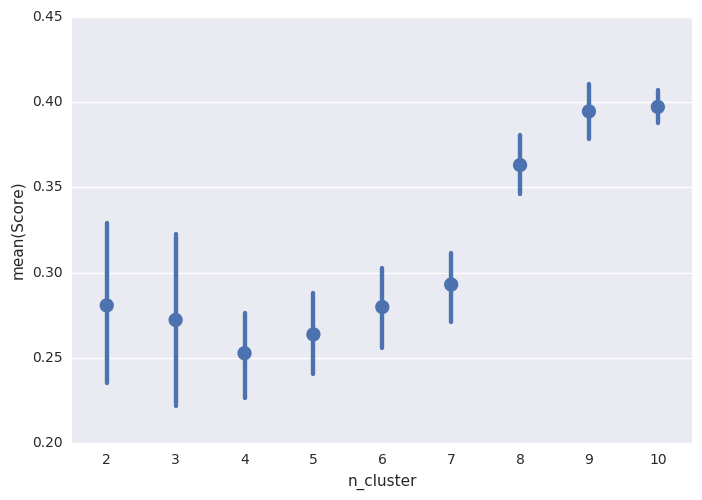

In [61]:

#print (data)    
df = pd.DataFrame(data)
df.columns=["Score","n_cluster"]
sns.pointplot(x= "n_cluster",y="Score",data= df, join =False)



Number of clusters: 2
Silhouette Coefficient: 0.358
Number of clusters: 3
Silhouette Coefficient: 0.271
Number of clusters: 4
Silhouette Coefficient: 0.203
Number of clusters: 5
Silhouette Coefficient: 0.192
Number of clusters: 6
Silhouette Coefficient: 0.226
Number of clusters: 7
Silhouette Coefficient: 0.269
Number of clusters: 8
Silhouette Coefficient: 0.322
Number of clusters: 9
Silhouette Coefficient: 0.301
Number of clusters: 10
Silhouette Coefficient: 0.353
Number of clusters: 2
Silhouette Coefficient: 0.247
Number of clusters: 3
Silhouette Coefficient: 0.255
Number of clusters: 4
Silhouette Coefficient: 0.261
Number of clusters: 5
Silhouette Coefficient: 0.223
Number of clusters: 6
Silhouette Coefficient: 0.230
Number of clusters: 7
Silhouette Coefficient: 0.285
Number of clusters: 8
Silhouette Coefficient: 0.329
Number of clusters: 9
Silhouette Coefficient: 0.289
Number of clusters: 10
Silhouette Coefficient: 0.297
Number of clusters: 2
Silhouette Coefficient: 0.244
Number of 

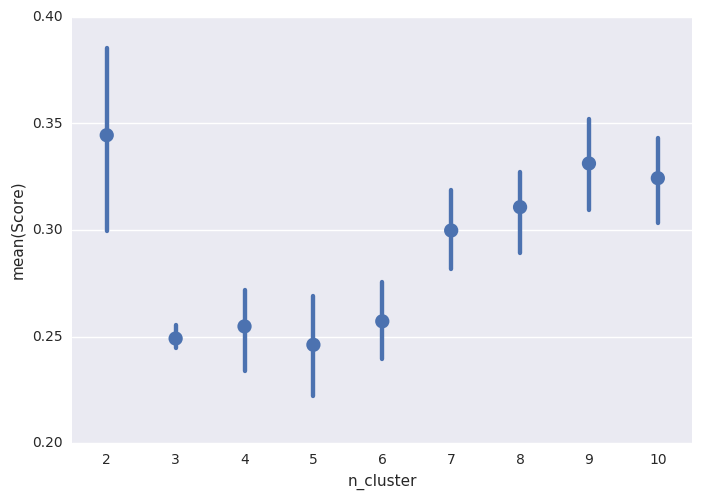

In [65]:

from sklearn.cluster import AgglomerativeClustering
data =[]
for i in range (0,10):
    for k in range (2,11):
        X = df_demo.values[np.random.choice(df_demo.values.shape[0], 1000)]

        from sklearn import metrics
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_db = sc.fit_transform(X)

    
        n_clusters = k

        labels = AgglomerativeClustering(n_clusters = n_clusters).fit_predict(X_db)




        print('Number of clusters: %d' % n_clusters)

        print("Silhouette Coefficient: %0.3f"
                % metrics.silhouette_score(X_db, labels))

        s=metrics.silhouette_score(X_db, labels)
        data.append([s,k])
df = pd.DataFrame(data)
df.columns=["Score","n_cluster"]
sns.pointplot(x= "n_cluster",y="Score",data= df, join =False)